In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


1. 데이터 확인 - 비어있는값 확인
2. Column 분석 - 상관관계, 개별분석 .describe()
3. Feature Engineer - class나누기, 구간 나누기, 텍스트 데이터 처리 등
4. 머신러닝 활용하여 모델 만들기
5. 모델 학습 및 예측
6. 모델 평가 - 성능평가 


In [25]:
import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [26]:
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')

# **1. 데이터 확인**

In [27]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [28]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# **1.1 NaN 값 확인**

80% 정도면 모델 학습에 포함시키지 않는다.

In [29]:
for col in df_train.columns: 
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format (
        col, 
        100*(df_train[col].isnull().sum()/df_train[col].shape[0])
    )
    # printf("column: %10s\t Percent of NaN value: %.2f%%\n", col, percent); C언어 처럼 메세지 포맷하는법.
    # .isnull 빈값을 True/False 로 반환 => .sum(): True를 1로 계산하여 빈값을 구한다.
    # df.shape[0] 전체 행의 개수. df.shape[1] 전체 열의 개수. df.shape -> (행 개수, 열 개수)
    print(msg);

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [30]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(
        col, 
        100*(df_test[col].isnull().sum()/df_test[col].shape[0])
    )
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


# Mano 라이브러리: 빈값찾기에 유용함 

<Axes: >

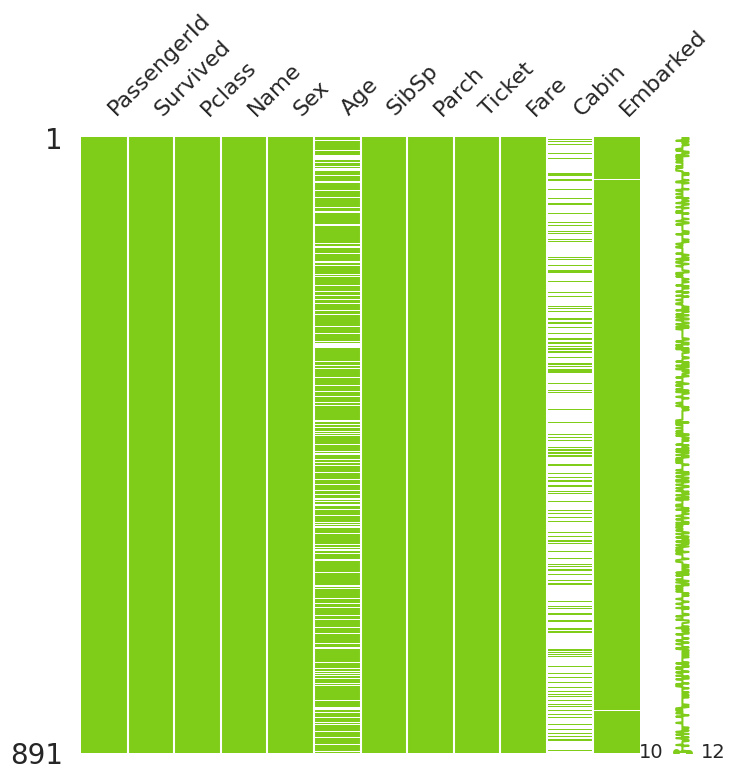

In [33]:
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.5, 0.8, 0.1))

<Axes: >

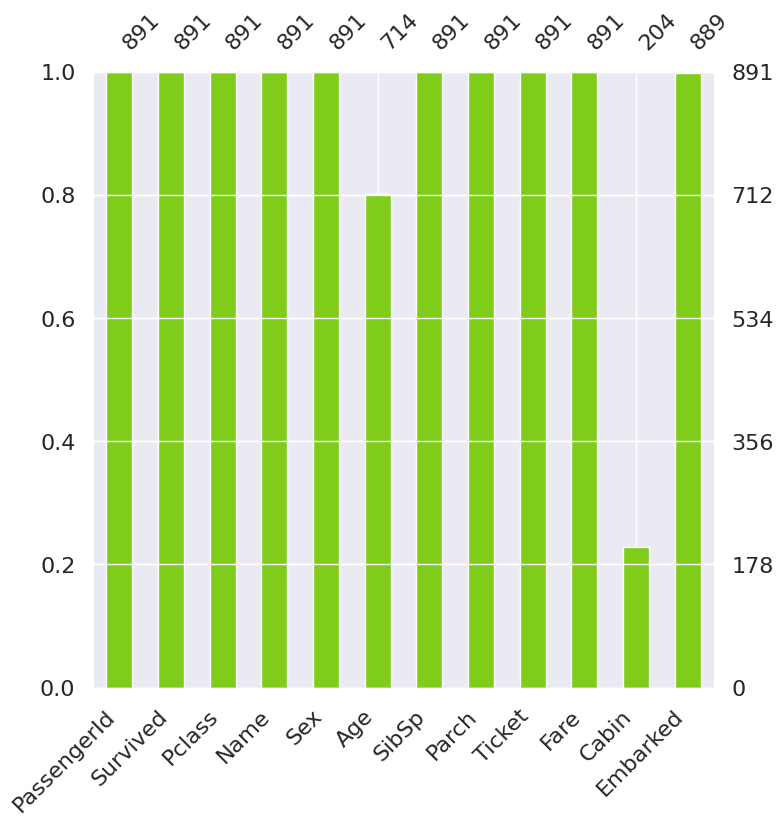

In [35]:
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.5, 0.8, 0.1))

<Axes: >

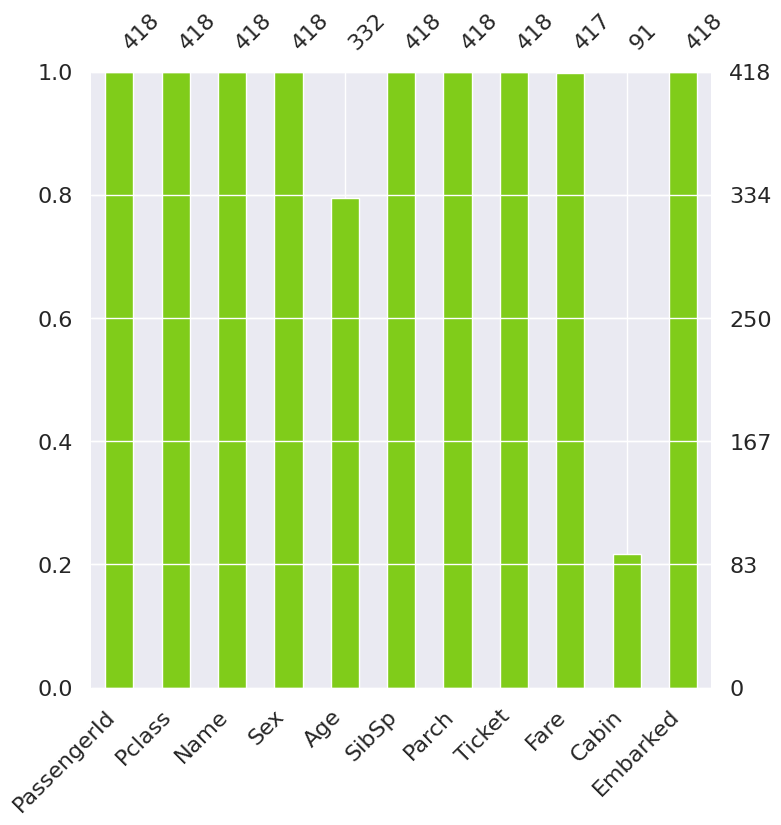

In [36]:
msno.bar(df=df_test.iloc[:, :], figsize=(8, 8), color=(0.5, 0.8, 0.1))

<Axes: ylabel='count'>

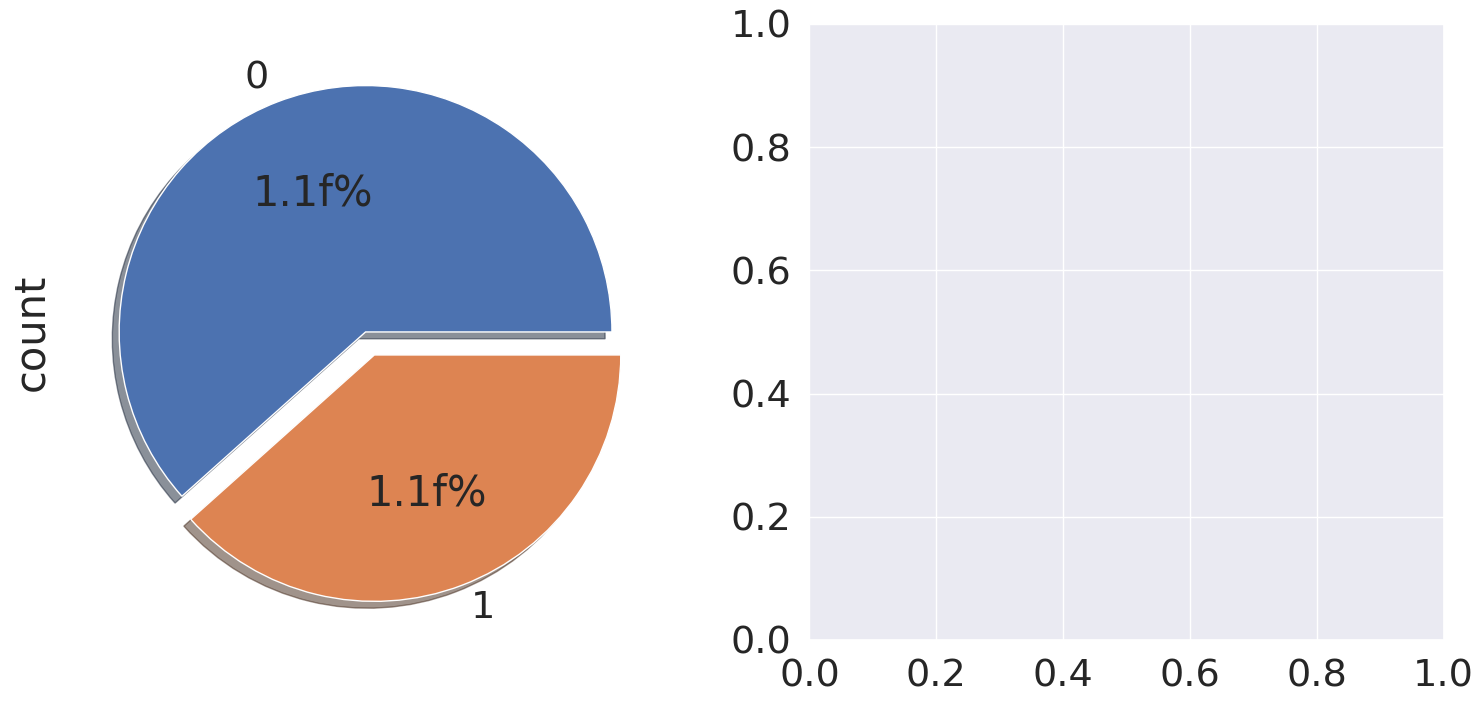

In [40]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
# f: 전체 figure, ax: ax[0], ax[1] 각각 그래프 
# .subplots(1,2) : 1행 2열 2개의 그래프 

df_train['Survived'].value_counts().plot.pie(
    explode=[0, 0.1],
    autopct='1.1f%%',
    ax=ax[0],
    shadow=True
)
